# Reading the dataset

In [ ]:
# Importing the required library
import pandas as pd

In [ ]:
# Reading the dataset
data = pd.read_csv('https://raw.githubusercontent.com/analyticsindiamagazine/MocksDatasets/main/Iris.csv')

In [ ]:
# Checking top 5 rows of dataset
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
# Checking the shape of the dataset
data.shape

(150, 6)

In [ ]:
# Class label count
data['Species'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
data['Species'].value_counts(normalize=True)

Iris-setosa        0.333333
Iris-versicolor    0.333333
Iris-virginica     0.333333
Name: Species, dtype: float64

# Defining input output features

In [ ]:
# Defining input (X) and output (y) features
X = data.iloc[:, 1:-1].values
y = data.iloc[:, -1].values

In [ ]:
# Creating training and test patterns
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, shuffle=True, random_state = 0)

In [ ]:
# Checking shape of training and test sets
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [ ]:
# input patterns
X_train[:11]

array([[6.4, 3.1, 5.5, 1.8],
       [5.4, 3. , 4.5, 1.5],
       [5.2, 3.5, 1.5, 0.2],
       [6.1, 3. , 4.9, 1.8],
       [6.4, 2.8, 5.6, 2.2],
       [5.2, 2.7, 3.9, 1.4],
       [5.7, 3.8, 1.7, 0.3],
       [6. , 2.7, 5.1, 1.6],
       [5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1]])

In [ ]:
# Min-Max Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
X_train[:11]

array([[0.58333333, 0.45833333, 0.75862069, 0.70833333],
       [0.30555556, 0.41666667, 0.5862069 , 0.58333333],
       [0.25      , 0.625     , 0.06896552, 0.04166667],
       [0.5       , 0.41666667, 0.65517241, 0.70833333],
       [0.58333333, 0.33333333, 0.77586207, 0.875     ],
       [0.25      , 0.29166667, 0.48275862, 0.54166667],
       [0.38888889, 0.75      , 0.10344828, 0.08333333],
       [0.47222222, 0.29166667, 0.68965517, 0.625     ],
       [0.44444444, 0.41666667, 0.53448276, 0.58333333],
       [0.41666667, 0.25      , 0.5       , 0.45833333],
       [0.69444444, 0.41666667, 0.75862069, 0.83333333]])

# Initializing and training Gaussian Naive Bayes

In [ ]:
# Defining the Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()

In [ ]:
# Training the SVM classifier
classifier.fit(X_train, y_train)

GaussianNB()

# Predecting and Evaluating the classifier

In [ ]:
# Making predictions with the test data
y_pred = classifier.predict(X_test)

In [ ]:
# Combining the actual and predicted values
pd.DataFrame(data={'Actual Labels': y_test, 'Predicted Labels': y_pred}).head()

,Actual Labels,Predicted Labels
0,Iris-virginica,Iris-virginica
1,Iris-versicolor,Iris-versicolor
2,Iris-setosa,Iris-setosa
3,Iris-virginica,Iris-virginica
4,Iris-setosa,Iris-setosa


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


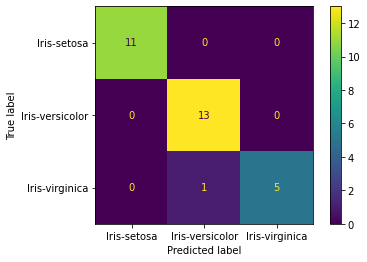

In [ ]:
# Confusuion matrix
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(classifier, X_test, y_test)

In [ ]:
# Accuracy score
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9666666666666667

In [ ]:
# Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       0.93      1.00      0.96        13
 Iris-virginica       1.00      0.83      0.91         6

       accuracy                           0.97        30
      macro avg       0.98      0.94      0.96        30
   weighted avg       0.97      0.97      0.97        30

